In [1]:
import pandas as pd

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'Dados', 'dataset_grad_pres.csv')

In [3]:
# Cria o DataFrame completo, com todos os dados do arquivo dataset_grad_pres.csv

df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [4]:
########################### TABELA ##################
# Grupo / Baixa renda / Escola Pública /  Etnia-PPI / PCD
# Grupo A sim sim sim não
# Grupo A1 sim sim sim sim
# Grupo B sim sim não não
# Grupo B1 sim sim não sim
# Grupo C não não não não
# Grupo D não sim sim não
# Grupo D1 não sim  sim sim
# Grupo E não sim não não
# Grupo E1 não sim não sim

In [5]:
# Inclui no final do DataFrame df_completo as colunas:
# Baixa renda; Escola pública; Etnia; PPI; PCD
# e preenche seus valores com "Sim" ou "Não", de acordo com a tabela acima

def classificar_baixa_renda(cota):
    baixa_renda_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1"]

    if cota in baixa_renda_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Baixa renda'] = df_completo['COTA'].apply(classificar_baixa_renda)

def classificar_escola_publica(cota):
    escola_publica_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1", "Grupo D", "Grupo D1", "Grupo E", "Grupo E1"]

    if cota in escola_publica_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Escola pública'] = df_completo['COTA'].apply(classificar_escola_publica)

def classificar_etnia_PPI(cota):
    etnia_ppi_categorias = ["Grupo A", "Grupo A1", "Grupo D", "Grupo D1"]

    if cota in etnia_ppi_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Etnia PPI'] = df_completo['COTA'].apply(classificar_etnia_PPI)

def classificar_PCD(cota):
    pcd_categorias = ["Grupo A1", "Grupo B1", "Grupo D1", "Grupo E1"]

    if cota in pcd_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['PCD'] = df_completo['COTA'].apply(classificar_PCD)

In [6]:
# Para visualizar os 5 primeiros registros do DataFrame completo, retire o # do início da linha abaixo

#df_completo.head()

In [8]:
# DataFrame somente com alunos que ingressaram de 2013 em diante

df_ingressantes_apos_2012 = df_completo.loc[(df_completo['ANO_INGRESSO'] > 2012)]

In [9]:
# Para visualizar os 5 primeiros registros do DataFrame somente com alunos que ingressaram de 2013 em diante, retire o # do início da linha abaixo

#df_ingressantes_apos_2012.head()

In [10]:
# Mantém no DataFrame df_ingressantes_apos_2012 apenas os alunos que ingressaram por SiSU ou PISM

df_ingressantes_apos_2012 = df_ingressantes_apos_2012.loc[(df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU VAGA OCIOSA')
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM VAGA OCIOSA')]

In [11]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "ABI -" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("ABI -", regex=False)]

In [12]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "OPÇÃO 2º CICLO CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("OPÇÃO 2º CICLO CIÊNCIAS EXATAS", regex=False)]

In [13]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "BACHARELADO INTERDISCIPLINAR" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("BACHARELADO INTERDISCIPLINAR", regex=False)]

In [14]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("CIÊNCIAS EXATAS", regex=False)]

In [15]:
# DataFrame de alunos evadidos de 2013 em diante
df_evadidos = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == 'Evadido']

# Quantidade de evadidos por curso
qtt_evadidos_por_curso = df_evadidos['CURSO_NOME'].value_counts()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

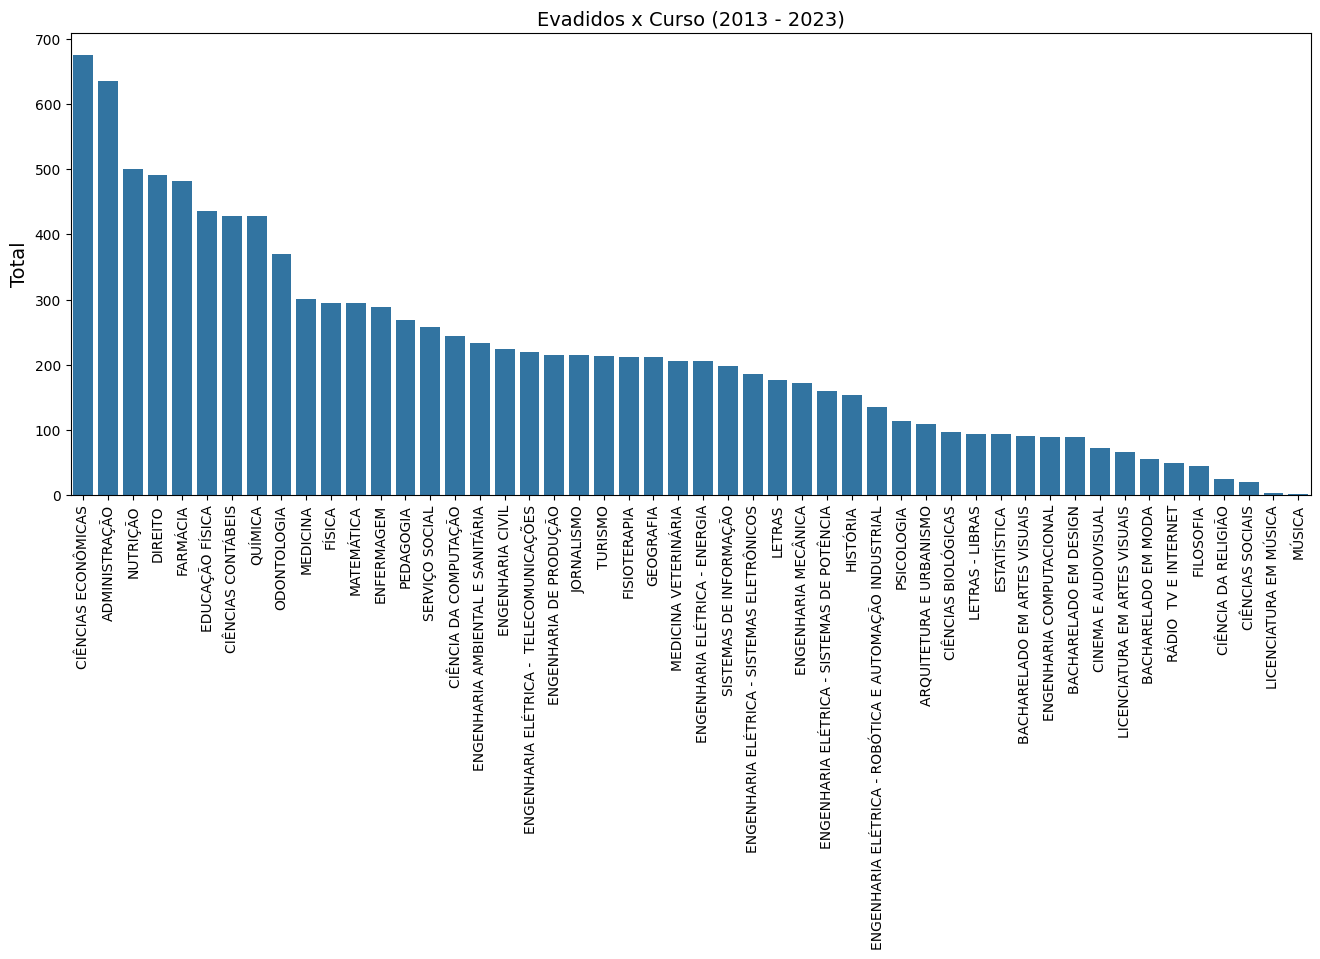

In [17]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=qtt_evadidos_por_curso.index, 
                y=qtt_evadidos_por_curso)

axes.set_title('Evadidos x Curso (2013 - 2023)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [18]:
def calcular_qtt_situacao(df_ingressantes_apos_2012, filtro, situacao):
    df = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == situacao]
    return df.groupby('CURSO_NOME')[filtro].value_counts()

In [19]:
# EXPLICAR O QUE A FUNÇÃO ABAIXO FAZ 

def evadido_vs_ingressante_por_filtro(df_ingressantes, filtro):
    #calcular uma série com o número de alunos, evadidos, número de concluídos e número de ativos
    qtt_filtro_por_curso = df_ingressantes.groupby('CURSO_NOME')[filtro].value_counts()
    qtt_evadidos_por_filtro = calcular_qtt_situacao(df_ingressantes, filtro, 'Evadido')
    qtt_concluidos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Concluido')
    qtt_ativos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Ativo')
    
    #cruzamento das Series criadas anterioresmente    
    df = pd.merge(qtt_filtro_por_curso, qtt_evadidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('_total', '_evadidos')).fillna(0)
    df = pd.merge(df, qtt_concluidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_concluintes')).fillna(0)
    df = pd.merge(df, qtt_ativos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_ativos')).fillna(0)
    df = df.rename(columns={'count': 'count_concluintes'}).sort_values(filtro)

    #calculando os percentuais
    df['pct_evasao'] = df['count_evadidos']/df['count_total']
    df['pct_concluido'] = df['count_concluintes']/df['count_total']
    df['pct_ativo'] = df['count_ativos']/df['count_total']
   
    return df

In [20]:
# EXPLICAR O QUE A FUNÇÃO FAZ 

def cota_por_curso(evadido_vs_ingressante, curso):
    
    ax = evadido_vs_ingressante[['count_evadidos', 'count_concluintes', 'count_ativos']].loc[curso].plot(kind='bar', stacked=True, figsize=[10,6])
    
    df = evadido_vs_ingressante.loc[curso]
    
    for i, eixo_x in enumerate(ax.get_xticklabels()):
        
        linha = int(eixo_x.get_text()) if eixo_x.get_text().isdigit() else eixo_x.get_text()
        
        pct_evasao_float = df['pct_evasao'].loc[linha]
        pct_evasao_str = f"{pct_evasao_float:.2%}"
        altura_y_evadidos = df['count_evadidos'].loc[linha]
        
        pct_concluintes_float = df['pct_concluido'].loc[linha]
        pct_concluintes_str = f"{pct_concluintes_float:.2%}"
        altura_y_concluintes = df['count_concluintes'].loc[linha]
        
        pct_ativos_float = df['pct_ativo'].loc[linha]
        pct_ativos_str = f"{pct_ativos_float:.2%}"
        altura_y_ativos = df['count_ativos'].loc[linha]
        
        if pct_evasao_float >= 0.05:
            ax.annotate(pct_evasao_str, xy=(i, altura_y_evadidos), rotation=45)
        
        if pct_concluintes_float >= 0.05:
            ax.annotate(pct_concluintes_str, xy=(i, altura_y_evadidos + altura_y_concluintes), rotation=45)
            
        if pct_ativos_float >= 0.05:
            ax.annotate(pct_ativos_str, xy=(i, altura_y_evadidos + altura_y_concluintes + altura_y_ativos), rotation=45)

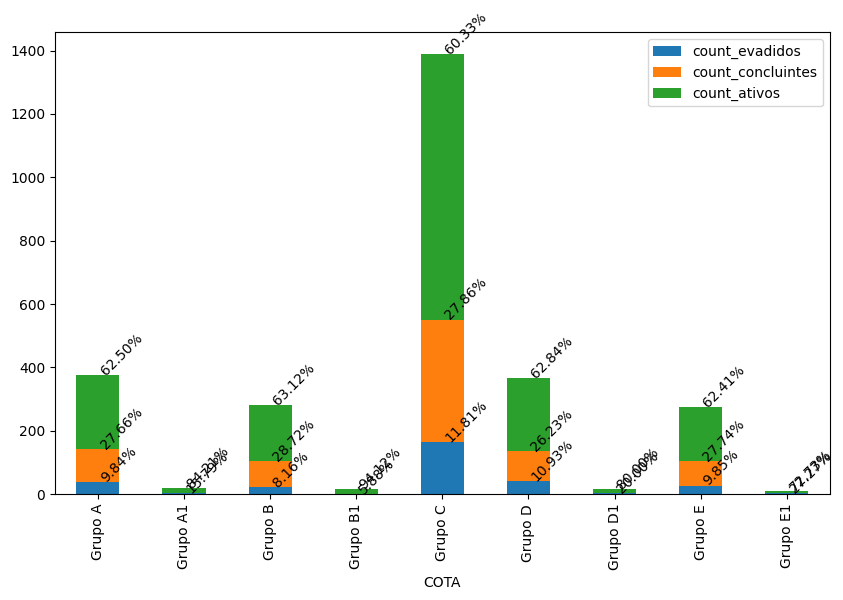

In [21]:
# Para gerar um gráfico que mostra a relação entre ingressantes e evadidos por curso, 
# incluindo qualquer outra coluna do DataFrame df_ingressantes_apos_2012,
# substitua as variáveis abaixo (coluna e curso)

coluna = "COTA"
curso = "MEDICINA"

cota_por_curso(evadido_vs_ingressante_por_filtro(df_ingressantes_apos_2012, coluna), curso)

In [22]:
df_completo

ANO_INGRESSO  SEMESTRE_INGRESSO              TIPO_INGRESSO     COTA  \
0              2008                  1  Transferência Obrigatória      NaN   
1              2008                  1                 VESTIBULAR  Grupo B   
2              2008                  1                       PISM  Grupo C   
3              2008                  1                 VESTIBULAR  Grupo C   
4              2008                  1                 VESTIBULAR  Grupo B   
...             ...                ...                        ...      ...   
64535          2023                  1                       SiSU  Grupo A   
64536          2023                  1                       SiSU  Grupo C   
64537          2023                  1                       SiSU  Grupo C   
64538          2023                  1                       PISM  Grupo B   
64539          2023                  1                       PISM  Grupo D   

                  CURSO_NOME                         AREA   SITUACAO  \
0        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
1        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
2        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
3        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas  Concluido   
4        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
...                      ...                          ...        ...   
64535  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   
64536  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   
64537  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   
64538  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64539  BACHARELADO EM DESIGN  Lingüística  Letras e Artes      Ativo   

        MOTIVO_SAIDA        CAMPUS     TURNO  ...          LNG          LAT  \
0      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -43,3646367  -21,7531292   
1      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -43,4042512  -21,8043129   
2           Abandono  JUIZ DE FORA  INTEGRAL  ...  -43,3585569  -21,7500694   
3          Conclusão  JUIZ DE FORA  INTEGRAL  ...  -44,2857937   -21,718564   
4      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -42,9806087   -20,850899   
...              ...           ...       ...  ...          ...          ...   
64535  A Especificar  JUIZ DE FORA  INTEGRAL  ...  -42,6097596  -20,6781012   
64536  A Especificar  JUIZ DE FORA  INTEGRAL  ...  -56,0978917  -15,6014109   
64537  A Especificar  JUIZ DE FORA  INTEGRAL  ...  -44,4513295  -22,4709621   
64538    Desistência  JUIZ DE FORA  INTEGRAL  ...  -42,9426188   -21,120123   
64539  A Especificar  JUIZ DE FORA  INTEGRAL  ...  -43,3954347  -21,7353517   

                                                  LOCAL     LNG_ORGM  \
0                 VALE DO IPE, JUIZ DE FORA, MG, BRASIL          NaN   
1      PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL          NaN   
2              SANTA CATARINA, JUIZ DE FORA, MG, BRASIL          NaN   
3                               ANDRELANDIA, MG, BRASIL          NaN   
4                             PAULA CANDIDO, MG, BRASIL          NaN   
...                                                 ...          ...   
64535                                 CANAA, MG, BRASIL  -42,6097596   
64536                                CUIABA, MT, BRASIL  -56,0978917   
64537                               RESENDE, RJ, BRASIL  -44,4513295   
64538                                   UBA, MG, BRASIL  -42,9426188   
64539    FRANCISCO BERNARDINO, JUIZ DE FORA, MG, BRASIL  -42,6141813   

          LAT_ORGM           LOCAL_ORGM Baixa renda Escola pública Etnia PPI  \
0              NaN                  NaN         Não            Não       Não   
1              NaN                  NaN         Sim            Sim       Não   
2              NaN                  NaN         Não            Não       Não   
3              NaN                  NaN         Não            Não     

In [23]:
df_completo.SITUACAO.unique()

array(['Evadido', 'Concluido', 'Ativo'], dtype=object)

In [24]:
df_filtrado = df_completo[df_completo['SITUACAO'] != 'Ativo']
df_filtrado

ANO_INGRESSO  SEMESTRE_INGRESSO              TIPO_INGRESSO     COTA  \
0              2008                  1  Transferência Obrigatória      NaN   
1              2008                  1                 VESTIBULAR  Grupo B   
2              2008                  1                       PISM  Grupo C   
3              2008                  1                 VESTIBULAR  Grupo C   
4              2008                  1                 VESTIBULAR  Grupo B   
...             ...                ...                        ...      ...   
64483          2022                  1                       SiSU  Grupo C   
64489          2022                  1                       PISM  Grupo C   
64495          2023                  1                       SiSU  Grupo C   
64523          2023                  1                       PISM  Grupo C   
64538          2023                  1                       PISM  Grupo B   

                  CURSO_NOME                         AREA   SITUACAO  \
0        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
1        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
2        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
3        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas  Concluido   
4        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
...                      ...                          ...        ...   
64483  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64489  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64495  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64523  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64538  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   

        MOTIVO_SAIDA        CAMPUS     TURNO  ...          LNG          LAT  \
0      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -43,3646367  -21,7531292   
1      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -43,4042512  -21,8043129   
2           Abandono  JUIZ DE FORA  INTEGRAL  ...  -43,3585569  -21,7500694   
3          Conclusão  JUIZ DE FORA  INTEGRAL  ...  -44,2857937   -21,718564   
4      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -42,9806087   -20,850899   
...              ...           ...       ...  ...          ...          ...   
64483    Desistência  JUIZ DE FORA  INTEGRAL  ...  -44,4513295  -22,4709621   
64489    Desistência  JUIZ DE FORA  INTEGRAL  ...  -42,8785858  -20,7548697   
64495    Desistência  JUIZ DE FORA  INTEGRAL  ...  -44,1772604  -22,5408519   
64523    Desistência  JUIZ DE FORA  INTEGRAL  ...  -43,3815506  -21,7732997   
64538    Desistência  JUIZ DE FORA  INTEGRAL  ...  -42,9426188   -21,120123   

                                                  LOCAL     LNG_ORGM  \
0                 VALE DO IPE, JUIZ DE FORA, MG, BRASIL          NaN   
1      PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL          NaN   
2              SANTA CATARINA, JUIZ DE FORA, MG, BRASIL          NaN   
3                               ANDRELANDIA, MG, BRASIL          NaN   
4                             PAULA CANDIDO, MG, BRASIL          NaN   
...                                                 ...          ...   
64483                               RESENDE, RJ, BRASIL  -44,4513295   
64489                                VICOSA, MG, BRASIL  -42,8785858   
64495                           BARRA MANSA, RJ, BRASIL  -44,1772604   
64523               SAO PEDRO, JUIZ DE FORA, MG, BRASIL  -43,3815506   
64538                                   UBA, MG, BRASIL  -42,9426188   

          LAT_ORGM                           LOCAL_ORGM Baixa renda  \
0              NaN                                  NaN         Não   
1              NaN                                  NaN         Sim   
2              NaN                                  NaN         Não   
3              NaN                                  NaN         Não   
4              NaN                  

In [25]:
df_filtrado.SITUACAO.unique()

array(['Evadido', 'Concluido'], dtype=object)

In [26]:
df_filtrado.SEMESTRE_INGRESSO.unique()

array([1, 2, 3], dtype=int64)

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
# Vamos converter Situacao em números

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["Concluido","Evadido"]])

# Fit it
ordinal_encoder.fit(df_filtrado[["SITUACAO"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_filtrado["SITUACAO_encoded"] = ordinal_encoder.transform(df_filtrado[["SITUACAO"]])

# Showing the transformed estudo
df_filtrado

[array(['Concluido', 'Evadido'], dtype=object)]

C:\Users\thais\AppData\Local\Temp\ipykernel_27544\1740048486.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["SITUACAO_encoded"] = ordinal_encoder.transform(df_filtrado[["SITUACAO"]])


ANO_INGRESSO  SEMESTRE_INGRESSO              TIPO_INGRESSO     COTA  \
0              2008                  1  Transferência Obrigatória      NaN   
1              2008                  1                 VESTIBULAR  Grupo B   
2              2008                  1                       PISM  Grupo C   
3              2008                  1                 VESTIBULAR  Grupo C   
4              2008                  1                 VESTIBULAR  Grupo B   
...             ...                ...                        ...      ...   
64483          2022                  1                       SiSU  Grupo C   
64489          2022                  1                       PISM  Grupo C   
64495          2023                  1                       SiSU  Grupo C   
64523          2023                  1                       PISM  Grupo C   
64538          2023                  1                       PISM  Grupo B   

                  CURSO_NOME                         AREA   SITUACAO  \
0        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
1        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
2        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
3        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas  Concluido   
4        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
...                      ...                          ...        ...   
64483  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64489  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64495  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64523  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64538  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   

        MOTIVO_SAIDA        CAMPUS     TURNO  ...          LAT  \
0      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -21,7531292   
1      A Especificar  JUIZ DE FORA  INTEGRAL  ...  -21,8043129   
2           Abandono  JUIZ DE FORA  INTEGRAL  ...  -21,7500694   
3          Conclusão  JUIZ DE FORA  INTEGRAL  ...   -21,718564   
4      A Especificar  JUIZ DE FORA  INTEGRAL  ...   -20,850899   
...              ...           ...       ...  ...          ...   
64483    Desistência  JUIZ DE FORA  INTEGRAL  ...  -22,4709621   
64489    Desistência  JUIZ DE FORA  INTEGRAL  ...  -20,7548697   
64495    Desistência  JUIZ DE FORA  INTEGRAL  ...  -22,5408519   
64523    Desistência  JUIZ DE FORA  INTEGRAL  ...  -21,7732997   
64538    Desistência  JUIZ DE FORA  INTEGRAL  ...   -21,120123   

                                                  LOCAL     LNG_ORGM  \
0                 VALE DO IPE, JUIZ DE FORA, MG, BRASIL          NaN   
1      PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL          NaN   
2              SANTA CATARINA, JUIZ DE FORA, MG, BRASIL          NaN   
3                               ANDRELANDIA, MG, BRASIL          NaN   
4                             PAULA CANDIDO, MG, BRASIL          NaN   
...                                                 ...          ...   
64483                               RESENDE, RJ, BRASIL  -44,4513295   
64489                                VICOSA, MG, BRASIL  -42,8785858   
64495                           BARRA MANSA, RJ, BRASIL  -44,1772604   
64523               SAO PEDRO, JUIZ DE FORA, MG, BRASIL  -43,3815506   
64538                                   UBA, MG, BRASIL  -42,9426188   

          LAT_ORGM                           LOCAL_ORGM Baixa renda  \
0              NaN                                  NaN         Não   
1              NaN                                  NaN         Sim   
2              NaN                                  NaN         Não   
3              NaN                                  NaN         Não   
4              NaN                                  NaN         Sim   
...            ...                                  ...         ...   
64483  -22,4709621                  RESENDE, RJ, B

In [29]:
df_filtrado.PCD.unique()

array(['Não', 'Sim'], dtype=object)

In [30]:
# Vamos converter Situacao em números

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["Não","Sim"]])

# Fit it
ordinal_encoder.fit(df_filtrado[["PCD"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_filtrado["PCD_encoded"] = ordinal_encoder.transform(df_filtrado[["PCD"]])

# Showing the transformed estudo
df_filtrado

[array(['Não', 'Sim'], dtype=object)]

C:\Users\thais\AppData\Local\Temp\ipykernel_27544\1866184167.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["PCD_encoded"] = ordinal_encoder.transform(df_filtrado[["PCD"]])


ANO_INGRESSO  SEMESTRE_INGRESSO              TIPO_INGRESSO     COTA  \
0              2008                  1  Transferência Obrigatória      NaN   
1              2008                  1                 VESTIBULAR  Grupo B   
2              2008                  1                       PISM  Grupo C   
3              2008                  1                 VESTIBULAR  Grupo C   
4              2008                  1                 VESTIBULAR  Grupo B   
...             ...                ...                        ...      ...   
64483          2022                  1                       SiSU  Grupo C   
64489          2022                  1                       PISM  Grupo C   
64495          2023                  1                       SiSU  Grupo C   
64523          2023                  1                       PISM  Grupo C   
64538          2023                  1                       PISM  Grupo B   

                  CURSO_NOME                         AREA   SITUACAO  \
0        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
1        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
2        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
3        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas  Concluido   
4        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
...                      ...                          ...        ...   
64483  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64489  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64495  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64523  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64538  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   

        MOTIVO_SAIDA        CAMPUS     TURNO  ...  \
0      A Especificar  JUIZ DE FORA  INTEGRAL  ...   
1      A Especificar  JUIZ DE FORA  INTEGRAL  ...   
2           Abandono  JUIZ DE FORA  INTEGRAL  ...   
3          Conclusão  JUIZ DE FORA  INTEGRAL  ...   
4      A Especificar  JUIZ DE FORA  INTEGRAL  ...   
...              ...           ...       ...  ...   
64483    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64489    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64495    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64523    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64538    Desistência  JUIZ DE FORA  INTEGRAL  ...   

                                                  LOCAL     LNG_ORGM  \
0                 VALE DO IPE, JUIZ DE FORA, MG, BRASIL          NaN   
1      PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL          NaN   
2              SANTA CATARINA, JUIZ DE FORA, MG, BRASIL          NaN   
3                               ANDRELANDIA, MG, BRASIL          NaN   
4                             PAULA CANDIDO, MG, BRASIL          NaN   
...                                                 ...          ...   
64483                               RESENDE, RJ, BRASIL  -44,4513295   
64489                                VICOSA, MG, BRASIL  -42,8785858   
64495                           BARRA MANSA, RJ, BRASIL  -44,1772604   
64523               SAO PEDRO, JUIZ DE FORA, MG, BRASIL  -43,3815506   
64538                                   UBA, MG, BRASIL  -42,9426188   

          LAT_ORGM                           LOCAL_ORGM Baixa renda  \
0              NaN                                  NaN         Não   
1              NaN                                  NaN         Sim   
2              NaN                                  NaN         Não   
3              NaN                                  NaN         Não   
4              NaN                                  NaN         Sim   
...            ...                                  ...         ...   
64483  -22,4709621                  RESENDE, RJ, BRASIL         Não   
64489  -20,7548697                   VICOSA, MG, BRASIL         Não   
64495  -22,5408519              BARRA MANSA, RJ, BRASIL         

In [31]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Instanciando o OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(df_filtrado[['Baixa renda']]) 

# Display the detected categories
print(f"As categorias detectadas pelo OneHotEncoder são {ohe.categories_}")

As categorias detectadas pelo OneHotEncoder são [array(['Não', 'Sim'], dtype=object)]


In [32]:
# Transformando os dados correntes de escolaridade 
df_filtrado[ohe.get_feature_names_out()] = ohe.transform(df_filtrado[['Baixa renda']])

# Drop the column which has been encoded
# estudo.drop(columns = ["grau_de_instr"], inplace = True)

# Show the dataset
df_filtrado

C:\Users\thais\AppData\Local\Temp\ipykernel_27544\1246355517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[ohe.get_feature_names_out()] = ohe.transform(df_filtrado[['Baixa renda']])
C:\Users\thais\AppData\Local\Temp\ipykernel_27544\1246355517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[ohe.get_feature_names_out()] = ohe.transform(df_filtrado[['Baixa renda']])


ANO_INGRESSO  SEMESTRE_INGRESSO              TIPO_INGRESSO     COTA  \
0              2008                  1  Transferência Obrigatória      NaN   
1              2008                  1                 VESTIBULAR  Grupo B   
2              2008                  1                       PISM  Grupo C   
3              2008                  1                 VESTIBULAR  Grupo C   
4              2008                  1                 VESTIBULAR  Grupo B   
...             ...                ...                        ...      ...   
64483          2022                  1                       SiSU  Grupo C   
64489          2022                  1                       PISM  Grupo C   
64495          2023                  1                       SiSU  Grupo C   
64523          2023                  1                       PISM  Grupo C   
64538          2023                  1                       PISM  Grupo B   

                  CURSO_NOME                         AREA   SITUACAO  \
0        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
1        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
2        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
3        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas  Concluido   
4        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
...                      ...                          ...        ...   
64483  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64489  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64495  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64523  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64538  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   

        MOTIVO_SAIDA        CAMPUS     TURNO  ...     LAT_ORGM  \
0      A Especificar  JUIZ DE FORA  INTEGRAL  ...          NaN   
1      A Especificar  JUIZ DE FORA  INTEGRAL  ...          NaN   
2           Abandono  JUIZ DE FORA  INTEGRAL  ...          NaN   
3          Conclusão  JUIZ DE FORA  INTEGRAL  ...          NaN   
4      A Especificar  JUIZ DE FORA  INTEGRAL  ...          NaN   
...              ...           ...       ...  ...          ...   
64483    Desistência  JUIZ DE FORA  INTEGRAL  ...  -22,4709621   
64489    Desistência  JUIZ DE FORA  INTEGRAL  ...  -20,7548697   
64495    Desistência  JUIZ DE FORA  INTEGRAL  ...  -22,5408519   
64523    Desistência  JUIZ DE FORA  INTEGRAL  ...  -21,7732997   
64538    Desistência  JUIZ DE FORA  INTEGRAL  ...   -21,120123   

                                LOCAL_ORGM Baixa renda Escola pública  \
0                                      NaN         Não            Não   
1                                      NaN         Sim            Sim   
2                                      NaN         Não            Não   
3                                      NaN         Não            Não   
4                                      NaN         Sim            Sim   
...                                    ...         ...            ...   
64483                  RESENDE, RJ, BRASIL         Não            Não   
64489                   VICOSA, MG, BRASIL         Não            Não   
64495              BARRA MANSA, RJ, BRASIL         Não            Não   
64523  SAO PEDRO, JUIZ DE FORA, MG, BRASIL         Não            Não   
64538                      UBA, MG, BRASIL         Sim            Sim   

      Etnia PPI  PCD SITUACAO_encoded PCD_encoded Baixa renda_Não  \
0           Não  Não              1.0         0.0             1.0   
1           Não  Não              1.0         0.0             0.0   
2           Não  Não              1.0         0.0             1.0   
3           Não  Não              0.0         0.0             1.0   
4           Não  Não              1.0         0.0             0.0   
...         ...  ...              ...         ...             ...   
64483       Não  Não              1.0         0.0   

In [39]:
colunas_selecionadas = ['SITUACAO_encoded', 'Baixa_renda_Sim', 'PCD_encoded', 'Escola_pública_encoded']
df_var_numeric = df_filtrado[colunas_selecionadas]

é importante observar que as medidas de correlação tradicionais, como a correlação de Pearson, não são apropriadas para variáveis binárias, pois essas medidas pressupõem que as variáveis são contínuas e normalmente distribuídas.

In [40]:
df_var_numeric.corr()

SITUACAO_encoded  Baixa_renda_Sim  PCD_encoded  \
SITUACAO_encoded                1.000000        -0.064583     0.032617   
Baixa_renda_Sim                -0.064583         1.000000     0.022533   
PCD_encoded                     0.032617         0.022533     1.000000   
Escola_pública_encoded         -0.007151         0.720391     0.056267   

                        Escola_pública_encoded  
SITUACAO_encoded                     -0.007151  
Baixa_renda_Sim                       0.720391  
PCD_encoded                           0.056267  
Escola_pública_encoded                1.000000

Em vez disso, para calcular a correlação entre variáveis binárias, você pode usar medidas específicas para esse tipo de variável. Duas medidas comuns são a Correlação de Matthews (coeficiente de Matthews) e o Coeficiente de Tschuprow.Se ambas as variáveis são binárias, a correlação de Matthews é uma escolha adequada

In [44]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef
from scipy.stats import pointbiserialr

# Calculando a correlação de Matthews
matthews_corr = matthews_corrcoef(df_filtrado['SITUACAO_encoded'], df_filtrado['Baixa_renda_Sim'])
print(f'Correlação de Matthews: {matthews_corr}')



Correlação de Matthews: -0.06458278200214922


In [42]:
# Calculando a correlação de Matthews
matthews_corr = matthews_corrcoef(df_filtrado['SITUACAO_encoded'], df_filtrado['PCD_encoded'])
print(f'Correlação de Matthews: {matthews_corr}')

Correlação de Matthews: 0.03261708224428821


In [43]:
df_filtrado.rename(columns={'Baixa renda_Sim': 'Baixa_renda_Sim'}, inplace=True)


C:\Users\thais\AppData\Local\Temp\ipykernel_27544\58390093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.rename(columns={'Baixa renda_Sim': 'Baixa_renda_Sim'}, inplace=True)


In [47]:
import statsmodels.formula.api as smf
 
model2 = smf.logit(formula="SITUACAO_encoded ~ Baixa_renda_Sim", data=df_filtrado).fit()
model2.params

Optimization terminated successfully.
         Current function value: 0.690840
         Iterations 3


Intercept          0.122176
Baixa_renda_Sim   -0.289042
dtype: float64

In [46]:
Baixa_renda_Sim = 1
ln_odd  = model2.params[0] + model2.params[1] * Baixa_renda_Sim
odd     = np.exp(ln_odd)
prob    = odd / (1 + odd)

print(f"Ln Odd de realizar evasão sendo de baixa renda:\t\t\t {ln_odd:.2f}")
print(f"Odds de realizar evasão sendo de baixa renda:\t\t {odd:.2f}")
print(f"Probability da evasão ser feita por alguem de baixa renda:\t {prob}")

Ln Odd de realizar evasão sendo de baixa renda:			 -0.17
Odds de realizar evasão sendo de baixa renda:		 0.85
Probability da evasão ser feita por alguem de baixa renda:	 0.45838011226944636


C:\Users\thais\AppData\Local\Temp\ipykernel_27544\3557842128.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ln_odd  = model2.params[0] + model2.params[1] * Baixa_renda_Sim


In [57]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SITUACAO_encoded   No. Observations:                44988
Model:                          Logit   Df Residuals:                    44986
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                0.003011
Time:                        06:34:26   Log-Likelihood:                -31079.
converged:                       True   LL-Null:                       -31173.
Covariance Type:            nonrobust   LLR p-value:                 9.936e-43
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1222      0.011     10.995      0.000       0.100       0.144
Baixa_renda_Sim    -0.2890      0.021    -13.679      0.000      -0.330      -0.248
===================================================================================
"""

In [38]:
# Vamos converter Situacao em números

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["Não","Sim"]])

# Fit it
ordinal_encoder.fit(df_filtrado[["Escola pública"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_filtrado["Escola_pública_encoded"] = ordinal_encoder.transform(df_filtrado[["Escola pública"]])

# Showing the transformed estudo
df_filtrado

[array(['Não', 'Sim'], dtype=object)]

C:\Users\thais\AppData\Local\Temp\ipykernel_27544\161343214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Escola_pública_encoded"] = ordinal_encoder.transform(df_filtrado[["Escola pública"]])


ANO_INGRESSO  SEMESTRE_INGRESSO              TIPO_INGRESSO     COTA  \
0              2008                  1  Transferência Obrigatória      NaN   
1              2008                  1                 VESTIBULAR  Grupo B   
2              2008                  1                       PISM  Grupo C   
3              2008                  1                 VESTIBULAR  Grupo C   
4              2008                  1                 VESTIBULAR  Grupo B   
...             ...                ...                        ...      ...   
64483          2022                  1                       SiSU  Grupo C   
64489          2022                  1                       PISM  Grupo C   
64495          2023                  1                       SiSU  Grupo C   
64523          2023                  1                       PISM  Grupo C   
64538          2023                  1                       PISM  Grupo B   

                  CURSO_NOME                         AREA   SITUACAO  \
0        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
1        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
2        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
3        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas  Concluido   
4        CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
...                      ...                          ...        ...   
64483  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64489  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64495  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64523  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   
64538  BACHARELADO EM DESIGN  Lingüística  Letras e Artes    Evadido   

        MOTIVO_SAIDA        CAMPUS     TURNO  ...  \
0      A Especificar  JUIZ DE FORA  INTEGRAL  ...   
1      A Especificar  JUIZ DE FORA  INTEGRAL  ...   
2           Abandono  JUIZ DE FORA  INTEGRAL  ...   
3          Conclusão  JUIZ DE FORA  INTEGRAL  ...   
4      A Especificar  JUIZ DE FORA  INTEGRAL  ...   
...              ...           ...       ...  ...   
64483    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64489    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64495    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64523    Desistência  JUIZ DE FORA  INTEGRAL  ...   
64538    Desistência  JUIZ DE FORA  INTEGRAL  ...   

                                LOCAL_ORGM Baixa renda Escola pública  \
0                                      NaN         Não            Não   
1                                      NaN         Sim            Sim   
2                                      NaN         Não            Não   
3                                      NaN         Não            Não   
4                                      NaN         Sim            Sim   
...                                    ...         ...            ...   
64483                  RESENDE, RJ, BRASIL         Não            Não   
64489                   VICOSA, MG, BRASIL         Não            Não   
64495              BARRA MANSA, RJ, BRASIL         Não            Não   
64523  SAO PEDRO, JUIZ DE FORA, MG, BRASIL         Não            Não   
64538                      UBA, MG, BRASIL         Sim            Sim   

      Etnia PPI  PCD SITUACAO_encoded PCD_encoded Baixa renda_Não  \
0           Não  Não              1.0         0.0             1.0   
1           Não  Não              1.0         0.0             0.0   
2           Não  Não              1.0         0.0             1.0   
3           Não  Não              0.0         0.0             1.0   
4           Não  Não              1.0         0.0             0.0   
...         ...  ...              ...         ...             ...   
64483       Não  Não              1.0         0.0             1.0   
64489       Não  Não              1.0         0.0             1.0   
64495       Não  Não              1.0         0.0             1.0   
6